<a href="https://colab.research.google.com/github/BasraQasba/Machine-Learning/blob/main/Happiness_score_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
data.shape

(158, 12)

dataset has 158 rows and 12 columns

In [5]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

features counts and Region are holding categorical values,           
feature happiness Rank is holding interger values,         
All other features are holding float variables

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


there are little skewness in all features, lets explore each columns in EDA section

In [7]:
  data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

dataset is not having any missing values

In [8]:
##lets drop Happiness Rank since its just a ranking based on happiness score which should not have any impact in happiness score prediction

new_data=data

In [9]:
new_data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
data.shape

(158, 12)

In [11]:
new_data.shape

(158, 12)

# EDA

Lets do univariate Analysis to understand data and find insight from each individual feature

In [12]:
countrylist=new_data['Country'].unique()
print("Total number of countries :", len(countrylist))

Total number of countries : 158


In [13]:
Regionlist=new_data['Region'].unique()
print("Total number of Regions :", len(Regionlist))
for i in Regionlist:
    print(i)

Total number of Regions : 10
Western Europe
North America
Australia and New Zealand
Middle East and Northern Africa
Latin America and Caribbean
Southeastern Asia
Central and Eastern Europe
Eastern Asia
Sub-Saharan Africa
Southern Asia


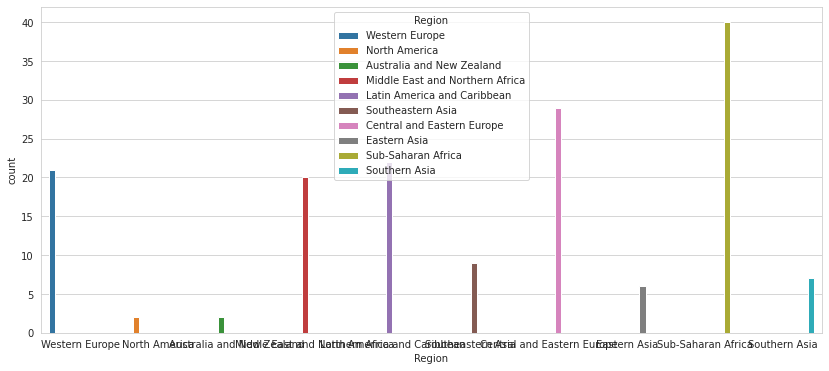

In [14]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='Region', hue='Region', data=data)

Sub-saharan Africa region countries are highly contributes in this data set. i.e, 25% countries nearly
Central and Estern europe region based countries are contributed nearly 19% of data
Latin America and Caribbean region based countries are contributed 15% of data
Western Europe region based countries are contributed 15% of data
North America & Australia and New Zealand contributed very less


10 regions and 158 contries are involved in this dataset

Happiness score is my target variable and rest are independent variables of Happiness score

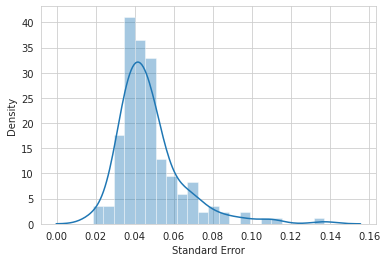

In [15]:
sns.distplot(new_data['Standard Error'])

column standard error is right skewed,      
majority of data is lies nearly between 0.03 to 0.07

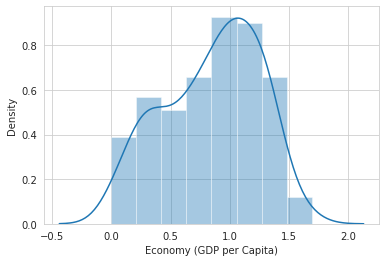

In [16]:
sns.distplot(new_data['Economy (GDP per Capita)'])

column Economy (GDP per Capita) is not normally distributed

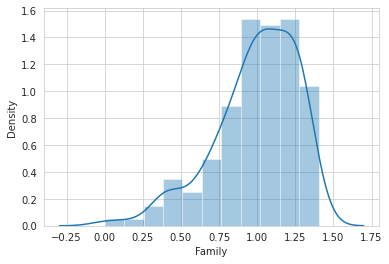

In [17]:
sns.distplot(new_data['Family'])

column Family is is not normally distributed and left skewed

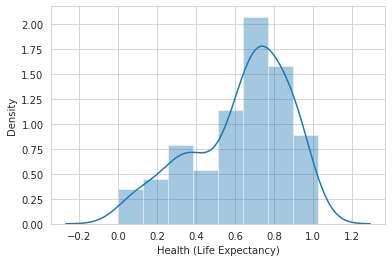

In [18]:
sns.distplot(new_data['Health (Life Expectancy)'])

column Health (Life Expectancy) is is not normally distributed and left skewed

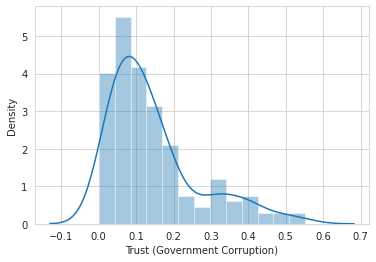

In [19]:
sns.distplot(new_data['Trust (Government Corruption)'])

column Trust (Government Corruption) is is not normally distributed and right skewed     
majority of data distributed between 0 to 0.2

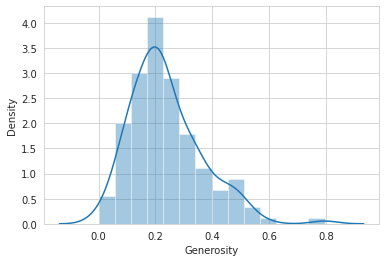

In [20]:
sns.distplot(new_data['Generosity'])

column Generosity is slightly right skewed     
majority of data lies between 0 to 0.04

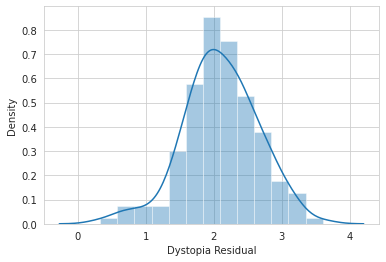

In [21]:
sns.distplot(new_data['Dystopia Residual'])

column Dystopia Residual is slightly right skewed
majority of data lies nearly between 1.5 to 3

all the columns are lighlty skewed and not normally distributed

# lets check for the outliers using boxplot

Happiness Rank                      AxesSubplot(0.125,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.390714,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

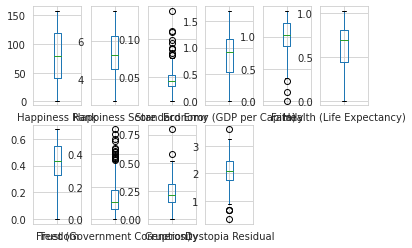

In [22]:
new_data.plot(kind='box',subplots=True,layout=(2,6))

there are outlier in columns standard error,Family,Trust (Government Corruption),Generosity,Dystopia Residual       
other columns does not have any outliers before handling outliers lets do little more EDA to understand the data

# Bivariate Analysis

In [23]:
new_data.groupby(['Region'])['Country'].unique()

Region
Australia and New Zealand                                   [New Zealand, Australia]
Central and Eastern Europe         [Czech Republic, Uzbekistan, Slovakia, Moldova...
Eastern Asia                       [Taiwan, Japan, South Korea, Hong Kong, China,...
Latin America and Caribbean        [Costa Rica, Mexico, Brazil, Venezuela, Panama...
Middle East and Northern Africa    [Israel, United Arab Emirates, Oman, Qatar, Sa...
North America                                                [Canada, United States]
Southeastern Asia                  [Singapore, Thailand, Malaysia, Indonesia, Vie...
Southern Asia                      [Bhutan, Pakistan, Bangladesh, India, Nepal, S...
Sub-Saharan Africa                 [Mauritius, Nigeria, Zambia, Somaliland region...
Western Europe                     [Switzerland, Iceland, Denmark, Norway, Finlan...
Name: Country, dtype: object

In [24]:
countriesperregion=new_data.groupby('Region')['Country'].count()
contributiondf=pd.DataFrame(countriesperregion)
contributiondf.head()

,Country
Region,
Australia and New Zealand,2
Central and Eastern Europe,29
Eastern Asia,6
Latin America and Caribbean,22
Middle East and Northern Africa,20


Text(0.5, 1.0, 'Happiness score Vs Regions')

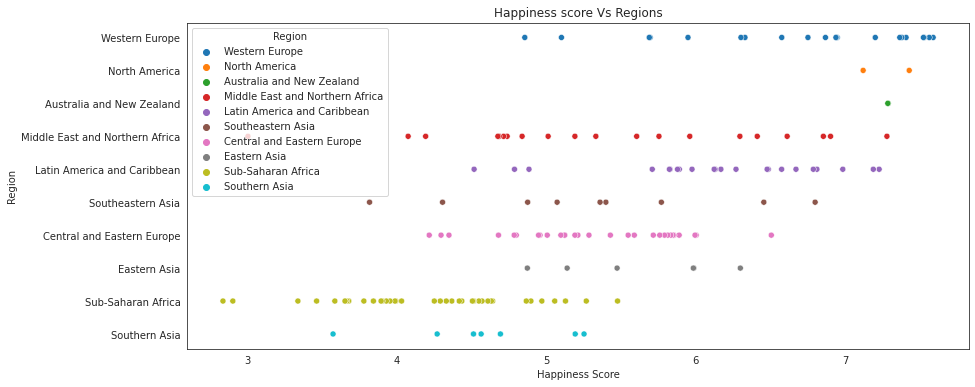

In [25]:
plt.figure(figsize=(14,6))
sns.set_style('white')
sns.scatterplot(x='Happiness Score',y='Region',hue='Region', data=new_data)
plt.title('Happiness score Vs Regions')

highest happiness score are from wetern europe country         
lowest happiness score are from subsaharan Africa        
highest happiness score is nearly 7         
western Europe,  North America, Australia and Newzealand,Latin ameria and Caribbean regions based coutries hold the most happiness score

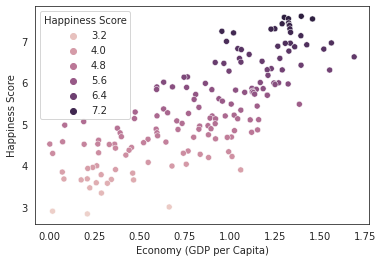

In [26]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',hue='Happiness Score', data=new_data)

More GDP per Capita cotributes to more Happiness score, means Economy GDP per capita highly correlate with Happiness score

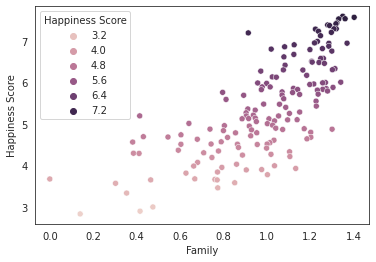

In [27]:
sns.scatterplot(x='Family',y='Happiness Score',hue='Happiness Score', data=new_data)

increase in family values increase the happines score

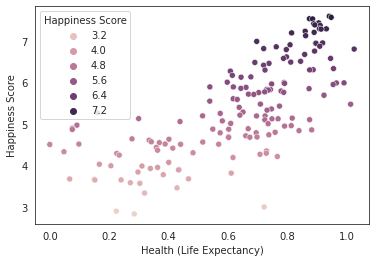

In [28]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',hue='Happiness Score', data=new_data)

Health also positively correlates with the Happiness Score

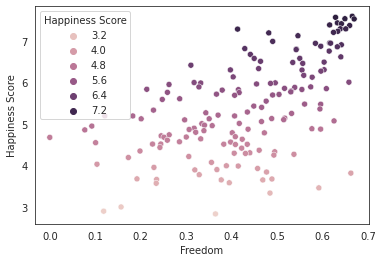

In [29]:
sns.scatterplot(x='Freedom',y='Happiness Score',hue='Happiness Score', data=new_data)

Health also positively correlates with the Happiness Score

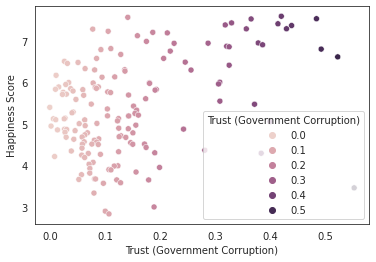

In [30]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',hue='Trust (Government Corruption)', data=new_data)

High corruption leads the highest happiness whereas the majority lies in low corruption, Corruption negatively correlates to Happiness score

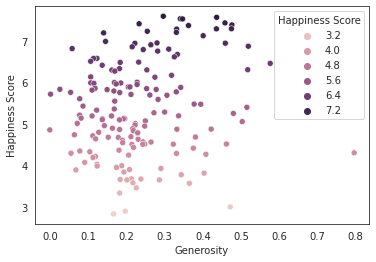

In [31]:
sns.scatterplot(x='Generosity',y='Happiness Score',hue='Happiness Score', data=new_data)

high happiness score lies between Generocity 0.2 to 0.5

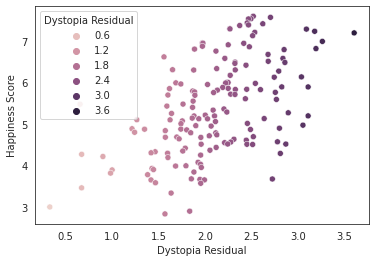

In [32]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',hue='Dystopia Residual', data=new_data)

Dystopia postively correlates with the Happiness score

Observation: 
    1. each factor except the corruption positively correlates with the happiness score
    

Multivariate EDA

In [33]:
corr=new_data.corr()

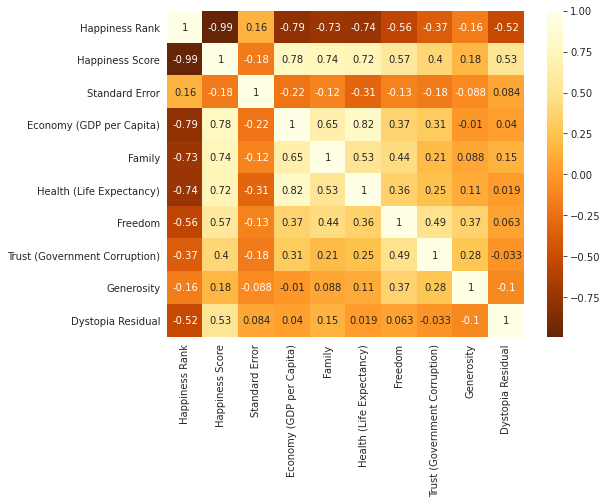

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='YlOrBr_r',annot=True)

Economy(GDP per capita), Family, Health(Life Exceptancy) contributes more in happiness score
standard error and Generocity contributes -0.18 and .18 resepectively

Lets verify how coutry and region correlates with the happiness score

In [35]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_data['Region']=LE.fit_transform(new_data['Region'])
new_data['Country']=LE.fit_transform(new_data['Country'])
new_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [36]:
corr=new_data.corr()

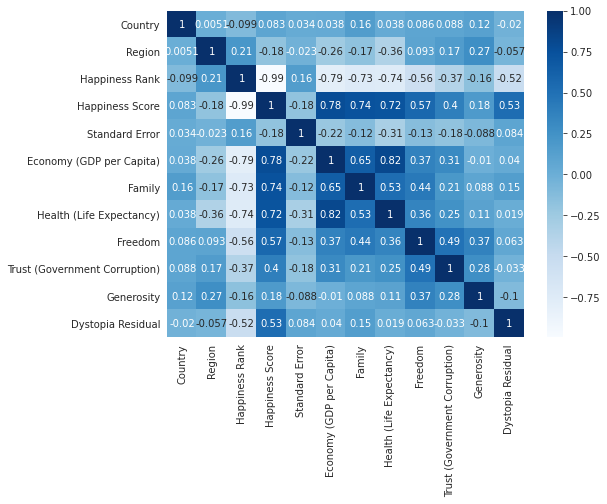

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='Blues',annot=True)

lets drop country and Region as happinesss core in not much impacted by the country or region

In [38]:
dropcountry=new_data.drop('Country', axis=1)

In [39]:
final_data=dropcountry.drop('Region', axis=1)

In [40]:
final_data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Handling outliers

In [41]:
from scipy.stats import zscore

z=np.abs(zscore(final_data))

fin_data=final_data[(z<3).all(axis=1)]

In [42]:
fin_data.shape

(149, 10)

In [43]:
final_data.shape

(158, 10)

only 5% of data is removed while fixing the outliers, considered its okay

# SKWENESS

In [44]:
fin_data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Happiness Rank,0.003268,-1.179952
Happiness Score,0.169740,-0.832230
Standard Error,1.243048,2.080947
Economy (GDP per Capita),-0.390657,-0.806461
Family,-0.811340,0.172549
Health (Life Expectancy),-0.747711,-0.318856
Freedom,-0.400867,-0.447264
Trust (Government Corruption),1.272530,0.921171
Generosity,0.654710,-0.000869
Dystopia Residual,-0.021144,0.270232


Still the skewness exist in standard error,Family,Health,Trust, generocity..... lets perform some techniques to remove skewness in data

standard error and Trust is highly skewed      
family,Health,Generocity is moderately skewed      
rest columns are fairly symmetrical

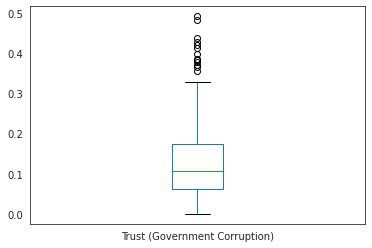

In [45]:
fin_data['Trust (Government Corruption)'].plot(kind='box')

In [46]:
fin_data['Trust (Government Corruption)']=np.log1p(fin_data['Trust (Government Corruption)'])

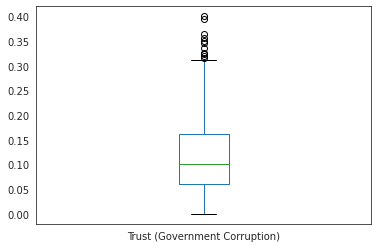

In [47]:
fin_data['Trust (Government Corruption)'].plot(kind='box')

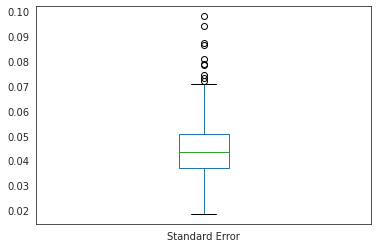

In [48]:
fin_data['Standard Error'].plot(kind='box')

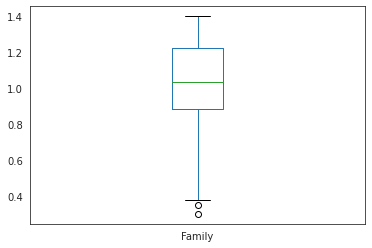

In [49]:
fin_data['Family'].plot(kind='box')

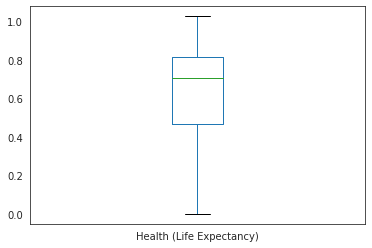

In [50]:
fin_data['Health (Life Expectancy)'].plot(kind='box')

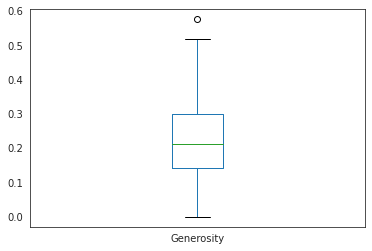

In [51]:
fin_data['Generosity'].plot(kind='box')

In [52]:
fin_data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.350502,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.132299,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.394451,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.311176,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.284856,0.45811,2.45176


In [53]:
skew_data=pd.DataFrame(fin_data)

In [54]:
skew_data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Happiness Rank,0.003268,-1.179952
Happiness Score,0.169740,-0.832230
Standard Error,1.243048,2.080947
Economy (GDP per Capita),-0.390657,-0.806461
Family,-0.811340,0.172549
Health (Life Expectancy),-0.747711,-0.318856
Freedom,-0.400867,-0.447264
Trust (Government Corruption),1.095190,0.465294
Generosity,0.654710,-0.000869
Dystopia Residual,-0.021144,0.270232


In [55]:
import scipy.stats as stat
import pylab

In [56]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(fin_data['Family'],dist='norm',plot=pylab)
    plt.show()

In [57]:
fin_data['Standard Error']=np.log(fin_data['Standard Error'])

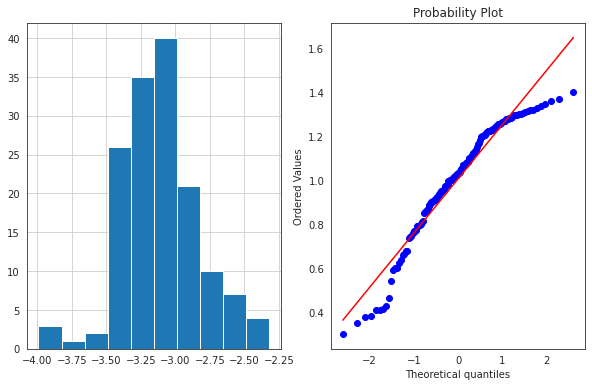

In [58]:
plot_data(fin_data,'Standard Error')

In [59]:
fin_data['Standard Error'].skew()

0.12322043132563748

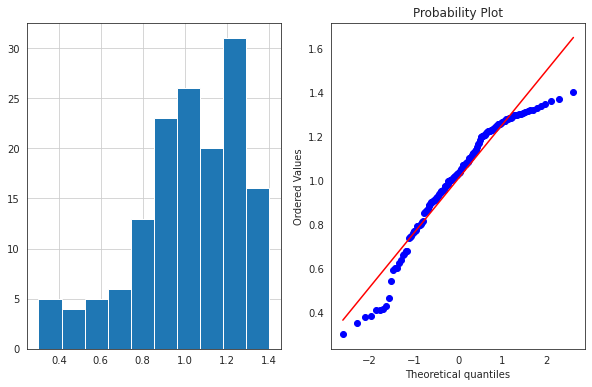

In [60]:
plot_data(skew_data,'Family')

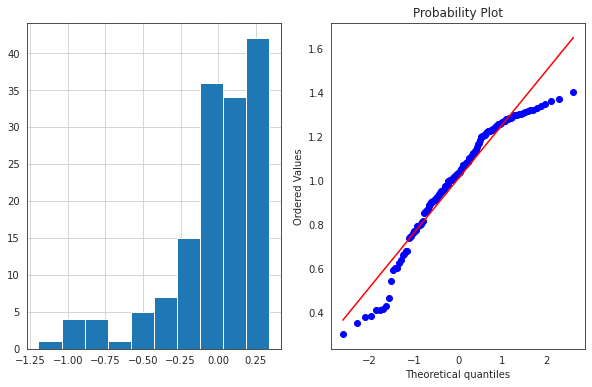

In [61]:
skew_data['Family log']=np.log(skew_data['Family'])
plot_data(skew_data,'Family log')

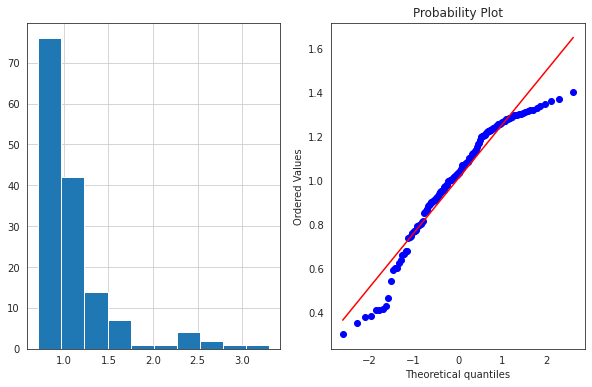

In [62]:
skew_data['Family_reciprocal']=1/skew_data.Family
plot_data(skew_data,'Family_reciprocal')

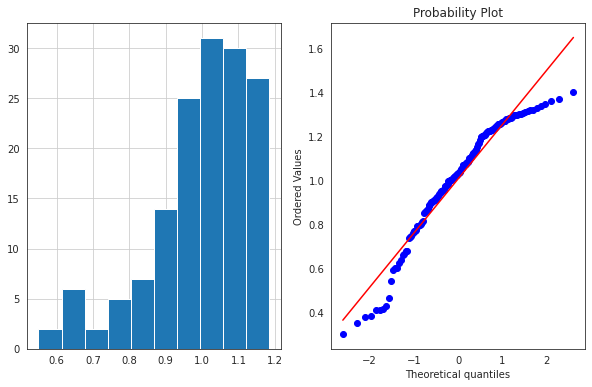

In [63]:
skew_data['Family_sqrt']=skew_data.Family**(1/2)
plot_data(skew_data,'Family_sqrt')

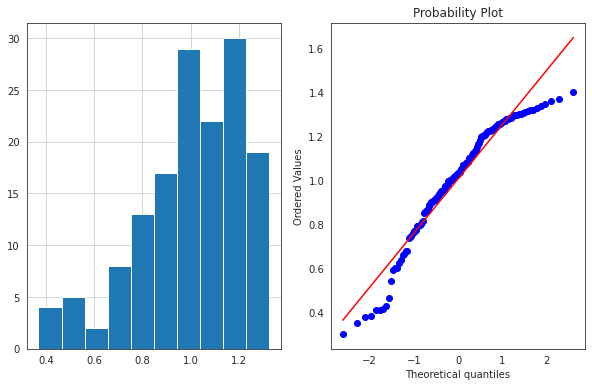

In [64]:
skew_data['Family_exponential']=skew_data.Family**(1/1.2)
plot_data(skew_data,'Family_exponential')

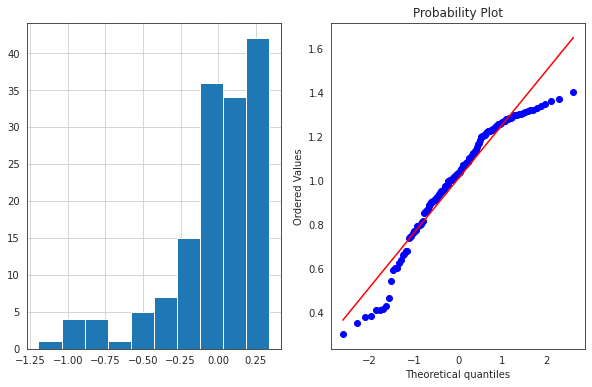

In [65]:
skew_data['Family_boxcox']=stat.boxcox(skew_data['Family'],0)
plot_data(skew_data,'Family_boxcox')

in all my known way of transformation i could not bring normal distribution to Family feature, hence dropping it to avoid overfitting

In [66]:
fin_data.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Family log', 'Family_reciprocal', 'Family_sqrt',
       'Family_exponential', 'Family_boxcox'],
      dtype='object')

In [67]:
df5= fin_data

In [68]:
df5.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.095190
Generosity                       0.654710
Dystopia Residual               -0.021144
Family log                      -1.611713
Family_reciprocal                2.603697
Family_sqrt                     -1.182069
Family_exponential              -0.928200
Family_boxcox                   -1.611713
dtype: float64

In [69]:
df5['Generosity']=np.sqrt(df5['Generosity'])

In [70]:
df5['Generosity'].skew()

-0.2857985130797859

In [71]:
#df5['Health (Life Expectancy)']=np.log1p(df5['Health (Life Expectancy)'])

In [72]:
#df5['Health (Life Expectancy)'].skew()

In [73]:
df5['Trust (Government Corruption)']=np.sqrt(df5['Trust (Government Corruption)'])

In [74]:
df5['Trust (Government Corruption)'].skew()

0.27514233169923213

In [75]:
df5.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    0.275142
Generosity                      -0.285799
Dystopia Residual               -0.021144
Family log                      -1.611713
Family_reciprocal                2.603697
Family_sqrt                     -1.182069
Family_exponential              -0.928200
Family_boxcox                   -1.611713
dtype: float64

In [76]:
from sklearn.preprocessing import PowerTransformer

In [77]:
power=PowerTransformer()
df6=pd.DataFrame(power.fit_transform(df5),columns=df5.columns)

In [78]:
df6.skew()

Happiness Rank                  -0.266578
Happiness Score                 -0.017940
Standard Error                  -0.033513
Economy (GDP per Capita)        -0.140644
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.076489
Trust (Government Corruption)    0.000495
Generosity                       0.018146
Dystopia Residual                0.014748
Family log                      -0.158158
Family_reciprocal                0.296666
Family_sqrt                     -0.179297
Family_exponential              -0.158200
Family_boxcox                   -0.158158
dtype: float64

Splitting the data

drop_trans_col=[ 'Family_reciprocal', 'Family_sqrt', 'Family_exponential','Family_boxcox']
df1=fin_data.drop('Family_reciprocal',axis=1)
df2=df1.drop('Family_sqrt',axis=1)
df3=df2.drop('Family_exponential',axis=1)
df4=df3.drop('Family_boxcox',axis=1)
df5=df4.drop('Family log',axis=1)

df5.head()

In [79]:
x=df6.drop('Happiness Score',axis=1)
y=df6['Happiness Score']



---



In [80]:
x.head()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Family log,Family_reciprocal,Family_sqrt,Family_exponential,Family_boxcox
0,-2.051514,-0.914911,1.492454,1.658880,1.469636,1.754982,1.862367,0.606434,0.755255,1.649473,-1.549714,1.639945,1.653342,1.649473
1,-1.995844,0.352918,1.194067,2.009125,1.511292,1.442182,0.299149,1.576005,1.111168,1.983144,-1.823786,1.977635,2.000084,1.983144
2,-1.945241,-1.003892,1.266612,1.730785,1.053469,1.616037,2.086863,0.930331,0.706495,1.718528,-1.607018,1.709442,1.724572,1.718528
3,-1.898098,-0.453657,1.695302,1.540248,1.117188,1.791023,1.644119,0.969951,0.655082,1.534933,-1.453959,1.525089,1.535771,1.534933
4,-1.853543,-0.768135,1.269159,1.487718,1.242549,1.477337,1.487127,1.717631,0.629030,1.483976,-1.411069,1.474153,1.483690,1.483976


In [81]:
y.head()

0    1.825912
1    1.806250
2    1.780485
3    1.776690
4    1.704342
Name: Happiness Score, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import r2_score

In [83]:
best_acc=0
best_random=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    accuracy=r2_score(y_test, pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)
    

Best Accuracy score is :  0.995741175849631  and Random_state is :  99


Linear regression accuracy is nearly 100%. lets split the data

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=99)

In [85]:
## Since i saw an overfitting in my model i am trying to standardise data set
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [86]:
x_train_scaled

array([[-0.96342365,  0.05912967,  0.47376395, ...,  0.79395462,
         0.79187921,  0.79618761],
       [ 0.96144797, -0.74183305, -1.27089768, ..., -0.7648503 ,
        -0.76736586, -0.76652821],
       [-1.43086402, -0.31309706,  0.24712207, ...,  0.92627214,
         0.92593521,  0.9309948 ],
       ...,
       [-0.01406292,  0.42407623,  1.4549459 , ...,  0.03537268,
         0.02846551,  0.02218186],
       [-0.83180685, -0.20397846,  0.90143097, ...,  1.32673637,
         1.33323635,  1.33632761],
       [ 1.21820579, -1.10122484, -0.02380416, ..., -1.16228159,
        -1.15943433, -1.14717771]])

In [87]:
#now lets fit the SC to x_test
x_test_scaled=scaler.transform(x_test)

In [88]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
accuracy=r2_score(y_test,pred)
    
print("Accuracy is : ", accuracy)

print("Errors: ")
print('mean Absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test,pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred)))


Accuracy is :  0.9882947456781571
Errors: 
mean Absolute error:  0.07478131600032391
Mean squared error:  0.010449972654566495
Root mean squared error:  0.10222510775032959


lets perform some ensemble baggin and boosting technique

In [89]:
from sklearn.ensemble import AdaBoostRegressor

In [90]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)

ad_pred=ad.predict(x_test)
ad_acc=r2_score(y_test, pred)
print(ad_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, ad_pred))
print('Mean squared error: ', mean_squared_error(y_test,ad_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,ad_pred)))

0.9882947456781571
Errors:
mean Absolute error:  0.03114860219607877
Mean squared error:  0.0018048487820692158
Root mean squared error:  0.04248351188483852


In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RFR_pred=ad.predict(x_test)
RFR_acc=r2_score(y_test, pred)
print(RFR_acc)

print('Errors:')

print('mean Absolute error: ', mean_absolute_error(y_test, RFR_pred))
print('Mean squared error: ', mean_squared_error(y_test,RFR_pred))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,RFR_pred)))

0.9882947456781571
Errors:
mean Absolute error:  0.03114860219607877
Mean squared error:  0.0018048487820692158
Root mean squared error:  0.04248351188483852


All the models are giving  nearly 100% accuracy, moving towards cross validation

> Indented block



In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
print("Linear regression cross validation accuracy is :", cross_val_score(LR,x,y,cv=5).mean())

Linear regression cross validation accuracy is : 0.5571739927912353


In [95]:
print("AdaBoostRegressor cross validation accuracy is :", cross_val_score(ad,x,y,cv=5).mean())

AdaBoostRegressor cross validation accuracy is : -2.7648312863290743


In [96]:
print("Random forest regressor cross validation accuracy is :", cross_val_score(RFR,x,y,cv=5).mean())

Random forest regressor cross validation accuracy is : -1.6294760711350391


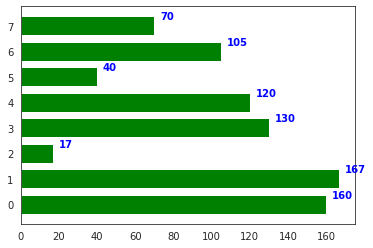

In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [160, 167, 17, 130, 120, 40, 105, 70]
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))

ax.barh(ind, y, width, color = "green")

for i, v in enumerate(y):
	ax.text(v + 3, i + .25, str(v),
			color = 'blue', fontweight = 'bold')
plt.show()
